<div align="center">
    <h1 style="font-family: 'Garamond', serif; color: #ff69b4;"> Default Prediction with Decision Tree Classifier</span>
    </h1>
    <hr style="border: 1px solid beige; width: 75%;">
</div>


<span style="font-family:Garamond; color:peachpuff; font-size:18px;">
<b>Team Members:</b> Minahil Rizwan, Abdullah Attique, Muhammad Nade Ali
</span>  
<br>
<span style="font-family:Garamond; color:peachpuff; font-size:18px;">
<b>Date:</b> 23rd July 2025
</span>


In [2]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, confusion_matrix, roc_curve
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, ConfusionMatrixDisplay,
    roc_curve, RocCurveDisplay
)
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
import pickle
from sklearn.preprocessing import StandardScaler
# Warnings
import warnings
warnings.filterwarnings('ignore')

## <font face="Gramond" color="peachpuff"> Load data </font>

In [3]:
df = pd.read_csv("application_train.csv")

print(f"Shape: {df.shape}")
print(df.info())
print(df.describe())
df.head()


Shape: (307511, 122)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None
          SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## <font face="Gramond" color="peachpuff"> Data Exploration </font>


COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
COMMONAREA_MEDI             214865
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_MODE    213514
                             ...  
EXT_SOURCE_2                   660
AMT_GOODS_PRICE                278
AMT_ANNUITY                     12
CNT_FAM_MEMBERS                  2
DAYS_LAST_PHONE_CHANGE           1
Length: 67, dtype: int64
TARGET
0    0.919271
1    0.080729
Name: proportion, dtype: float64


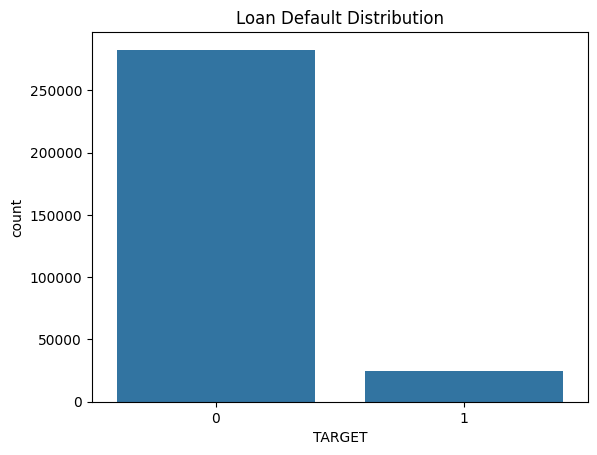

In [4]:
# missing values per column
missing = df.isnull().sum().sort_values(ascending=False)
print(missing[missing > 0])

# target variable distribution
print(df['TARGET'].value_counts(normalize=True))
sns.countplot(x='TARGET', data=df)
plt.title('Loan Default Distribution')
plt.show()


In [5]:
# Drop columns with >50% missing
threshold = len(df) * 0.5
df = df.dropna(thresh=threshold, axis=1)
print("Shape after dropping cols with >50% missing:", df.shape)

# numerical cols with median
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# categorical cols with mode
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])

print("Remaining missing values:", df.isnull().sum().sum())


Shape after dropping cols with >50% missing: (307511, 81)
Remaining missing values: 0


In [6]:
from sklearn.preprocessing import LabelEncoder

# categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {cat_cols}")

le = LabelEncoder() # label Encode binary categorical columns
binary_cols = [col for col in cat_cols if df[col].nunique() == 2]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])
    print(f"Label Encoded: {col}")

# One-Hot Encode multi-category categorical columns
multi_cols = [col for col in cat_cols if df[col].nunique() > 2]

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)
print(f"One-Hot Encoded: {multi_cols}")
print(f"Shape after encoding: {df.shape}")


Categorical columns: ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'EMERGENCYSTATE_MODE']
Label Encoded: NAME_CONTRACT_TYPE
Label Encoded: FLAG_OWN_CAR
Label Encoded: FLAG_OWN_REALTY
Label Encoded: EMERGENCYSTATE_MODE
One-Hot Encoded: ['CODE_GENDER', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
Shape after encoding: (307511, 181)


In [7]:
# days to years
df['AGE_YEARS'] = (-df['DAYS_BIRTH']) // 365

df['YEARS_EMPLOYED'] = (-df['DAYS_EMPLOYED']) // 365

df['TARGET'] = df['TARGET'].astype(int)

print(df[['AGE_YEARS', 'YEARS_EMPLOYED']].head())
print(df.dtypes)


   AGE_YEARS  YEARS_EMPLOYED
0         25               1
1         45               3
2         52               0
3         52               8
4         54               8
SK_ID_CURR                             int64
TARGET                                 int64
NAME_CONTRACT_TYPE                     int64
FLAG_OWN_CAR                           int64
FLAG_OWN_REALTY                        int64
                                       ...  
ORGANIZATION_TYPE_Transport: type 4     bool
ORGANIZATION_TYPE_University            bool
ORGANIZATION_TYPE_XNA                   bool
AGE_YEARS                              int64
YEARS_EMPLOYED                         int64
Length: 183, dtype: object


## <font face="Gramond" color="peachpuff"> Feature Engineering </font>

In [8]:
df = pd.read_csv("application_train.csv")  # Replace with your actual file name

# Step 2: Make a copy
df_engineered = df.copy()



**Adding Features**

In [9]:
def safe_divide(a, b):
    return np.where(b == 0, 0, a / b)

# 1. AGE & EMPLOYMENT Features
df_engineered['AGE'] = (-df_engineered['DAYS_BIRTH']) / 365
df_engineered['YEARS_EMPLOYED'] = (-df_engineered['DAYS_EMPLOYED']) / 365
df_engineered['AGE_EMPLOYED_RATIO'] = safe_divide(df_engineered['YEARS_EMPLOYED'], df_engineered['AGE'])

# 2. Financial Ratios
df_engineered['CREDIT_INCOME_RATIO'] = safe_divide(df_engineered['AMT_CREDIT'], df_engineered['AMT_INCOME_TOTAL'])
df_engineered['ANNUITY_INCOME_RATIO'] = safe_divide(df_engineered['AMT_ANNUITY'], df_engineered['AMT_INCOME_TOTAL'])
df_engineered['ANNUITY_CREDIT_RATIO'] = safe_divide(df_engineered['AMT_ANNUITY'], df_engineered['AMT_CREDIT'])
df_engineered['INCOME_PER_FAM_MEMBER'] = safe_divide(df_engineered['AMT_INCOME_TOTAL'], df_engineered['CNT_FAM_MEMBERS'])

# 3. Time-based Features
df_engineered['REGISTRATION_AGE_DIFF'] = df_engineered['DAYS_ID_PUBLISH'] - df_engineered['DAYS_REGISTRATION']
df_engineered['PHONECHANGE_AGE_DIFF'] = df_engineered['DAYS_LAST_PHONE_CHANGE'] - df_engineered['DAYS_BIRTH']

# 4. Flags / Binary Combinations
df_engineered['CONTACT_AVAILABILITY'] = df_engineered[['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL']].sum(axis=1)
df_engineered['HAS_CAR_OLD'] = ((df_engineered['FLAG_OWN_CAR'] == 'Y') & (df_engineered['OWN_CAR_AGE'] > 10)).astype(int)

# 5. Regional Stability
df_engineered['IS_REGIONAL_MOVER'] = (
    (df_engineered['REG_REGION_NOT_LIVE_REGION'] == 1) |
    (df_engineered['REG_REGION_NOT_WORK_REGION'] == 1) |
    (df_engineered['LIVE_REGION_NOT_WORK_REGION'] == 1)
).astype(int)

# 6. Social Circle Ratios
df_engineered['SOCIAL_DEF_RATIO'] = safe_divide(
    df_engineered['DEF_30_CNT_SOCIAL_CIRCLE'],
    df_engineered['OBS_30_CNT_SOCIAL_CIRCLE']
)

# 7. Optional: Count of missing values per row
df_engineered['NUM_MISSING'] = df_engineered.isnull().sum(axis=1)

# Step 4: Save engineered data
df_engineered.to_csv("engineered_data.csv", index=False)
print("✅ Feature-engineered data saved successfully.")

✅ Feature-engineered data saved successfully.


**Outliers and Skew Detection**

In [10]:
df = pd.read_csv("engineered_data.csv")

def detect_outliers_iqr(df, cols):
    outlier_summary = {}
    for col in cols:
        if np.issubdtype(df[col].dtype, np.number):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            outlier_summary[col] = len(outliers)
    return outlier_summary

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
outliers = detect_outliers_iqr(df, numeric_cols)

# Sort by number of outliers (descending)
outliers_sorted = dict(sorted(outliers.items(), key=lambda item: item[1], reverse=True))

print("Outliers detected per column (Top 10):")
for col, count in list(outliers_sorted.items())[:10]:
    print(f"{col}: {count}")


from scipy.stats import skew

skewed_feats = df[numeric_cols].apply(lambda x: skew(x.dropna()))
highly_skewed = skewed_feats[abs(skewed_feats) > 1].sort_values(ascending=False)

print("Highly skewed features (skewness > 1):")
print(highly_skewed)


Outliers detected per column (Top 10):
REGION_RATING_CLIENT: 80527
REGION_RATING_CLIENT_W_CITY: 78027
DAYS_EMPLOYED: 72217
YEARS_EMPLOYED: 72217
REG_CITY_NOT_WORK_CITY: 70867
AGE_EMPLOYED_RATIO: 67727
FLAG_WORK_PHONE: 61308
FLAG_EMP_PHONE: 55386
LIVE_CITY_NOT_WORK_CITY: 55215
AMT_REQ_CREDIT_BUREAU_QRT: 50575
Highly skewed features (skewness > 1):
FLAG_DOCUMENT_12                392.112866
AMT_INCOME_TOTAL                391.557744
FLAG_DOCUMENT_10                209.588031
INCOME_PER_FAM_MEMBER           187.366395
FLAG_DOCUMENT_2                 153.791067
                                   ...    
YEARS_BEGINEXPLUATATION_MODE    -14.755177
YEARS_BEGINEXPLUATATION_AVG     -15.515117
YEARS_BEGINEXPLUATATION_MEDI    -15.572976
FLAG_CONT_MOBILE                -23.081060
FLAG_MOBIL                     -554.534039
Length: 96, dtype: float64


**Splittin training and testing data + NOT Normalizing the Data Because Descion Tree does not need it to Scale the Data** 

In [11]:
train_df, test_df = train_test_split(df, test_size=0.3, random_state=42)

## <font face="Gramond" color="peachpuff"> Model Training </font>

In [12]:
X = df.drop(columns=['TARGET'])
y = df['TARGET']

# Step 2: One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)  # Automatically handles all string columns

# Step 3: Split into train, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 4: Train a basic Decision Tree classifier
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

**Tuning the hyperparameters using GridSearchCV**

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_train_val = imputer.fit_transform(X_train_val)

param_grid = {
    'max_depth': [3, 5, 10, 15],  # Removed None
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=2  # Try 1 or 2 if -1 causes problems
)

grid_search.fit(X_train_val, y_train_val)

print("Best Parameters:", grid_search.best_params_)
best_dt = grid_search.best_estimator_


Best Parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


## <font face="Gramond" color="peachpuff"> Model Evaluation </font>

Evaluating the model using accuracy, precision, recall, F1-score, and ROC-AUC and also plotting the confusion matrix and ROC curve

Accuracy: 0.7316065882965058
Precision: 0.15945786682380672
Recall: 0.5467771266922611
F1 Score: 0.2469090743190839
ROC AUC Score: 0.6851432316242356


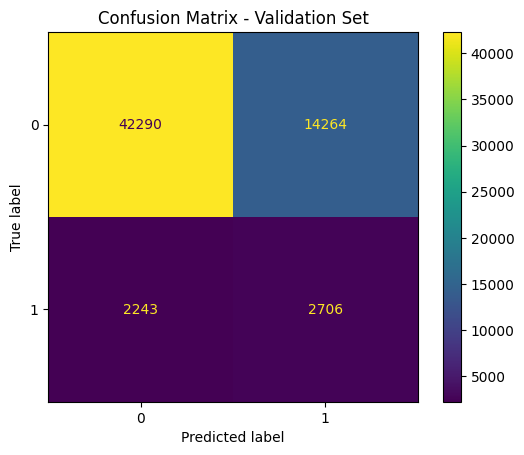

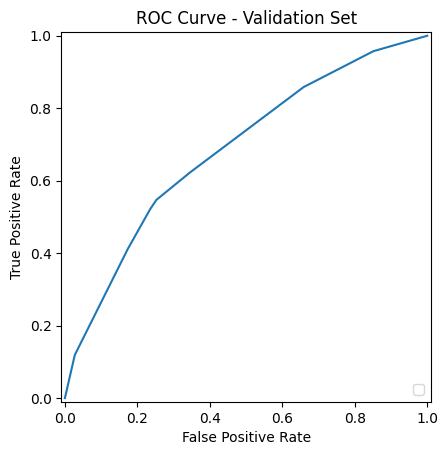

In [14]:
y_pred_best = best_dt.predict(X_test)
y_proba_best = best_dt.predict_proba(X_test)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba_best))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_best)
plt.title("Confusion Matrix - Validation Set")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba_best)
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title("ROC Curve - Validation Set")
plt.show()

Tree Visualization

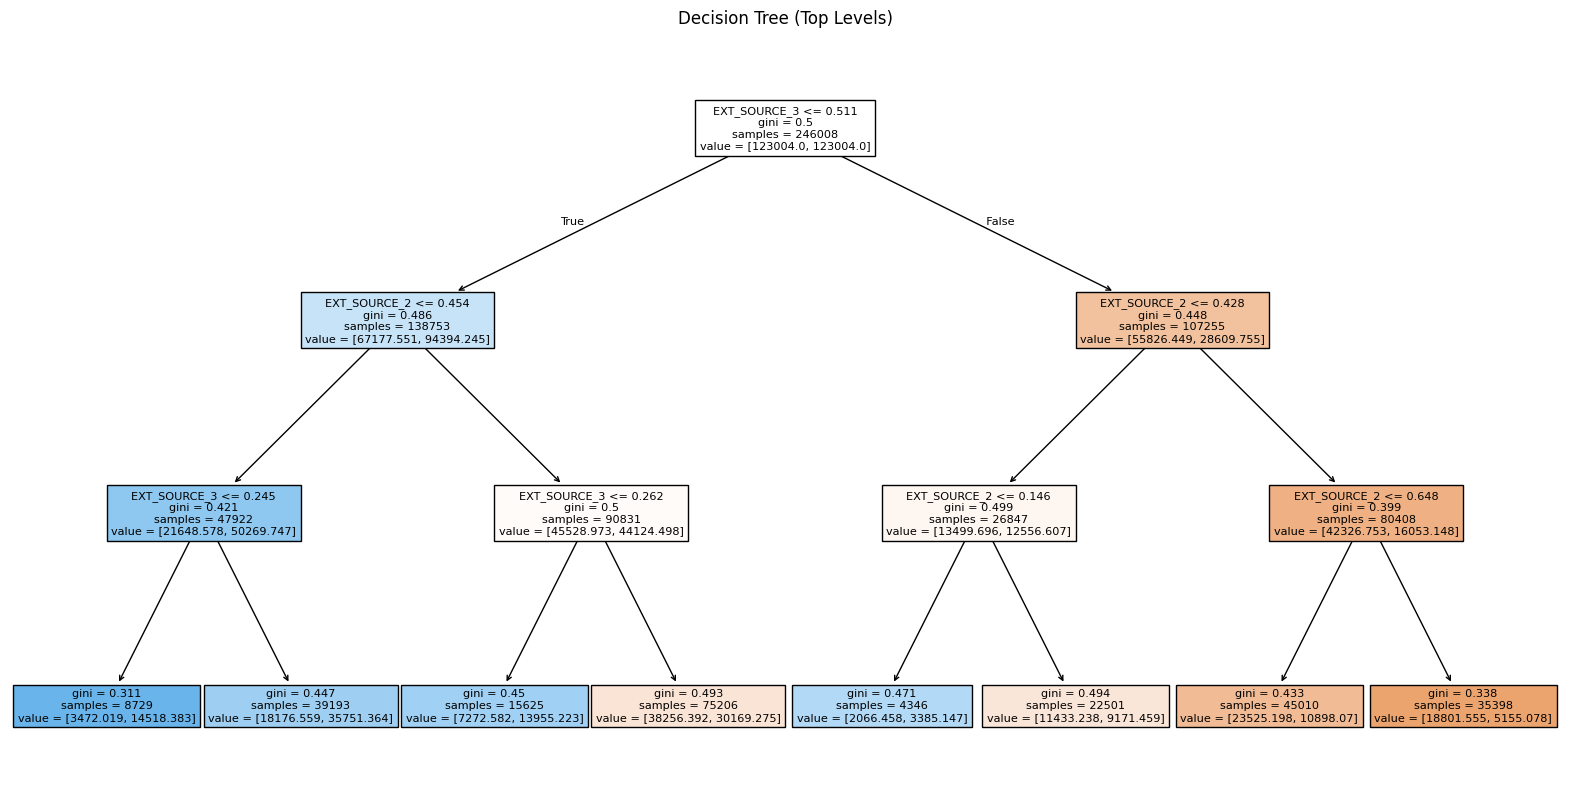

In [15]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt, filled=True, feature_names=X.columns, max_depth=3)
plt.title("Decision Tree (Top Levels)")
plt.show()

## <font face="Gramond" color="peachpuff"> Optimization </font>

**Pruning**

In [16]:
# Limit max depth and set min samples per leaf
dt_pruned = DecisionTreeClassifier(
    class_weight='balanced',
    max_depth=6,                # Try 4 to 10
    min_samples_leaf=50,        # Prevent tiny splits
    random_state=42
)
dt_pruned.fit(X_train, y_train)

# Evaluate
print("Validation Accuracy (Pruned Tree):", dt_pruned.score(X_val, y_val))
print("Test Accuracy (Pruned Tree):", dt_pruned.score(X_test, y_test))


Validation Accuracy (Pruned Tree): 0.6580273812233749
Test Accuracy (Pruned Tree): 0.6611384810497049


**Feature Importance**

In [17]:
print("Unpruned Tree - Training Accuracy:", best_dt.score(X_train, y_train))
print("Unpruned Tree - Validation Accuracy:", best_dt.score(X_val, y_val))
print("Unpruned Tree - Test Accuracy:", best_dt.score(X_test, y_test))

print("Validation Accuracy (Pruned Tree):", dt_pruned.score(X_val, y_val))
print("Test Accuracy (Pruned Tree):", dt_pruned.score(X_test, y_test))


Unpruned Tree - Training Accuracy: 0.7327566583200547
Unpruned Tree - Validation Accuracy: 0.7299112223992715
Unpruned Tree - Test Accuracy: 0.7316065882965058
Validation Accuracy (Pruned Tree): 0.6580273812233749
Test Accuracy (Pruned Tree): 0.6611384810497049


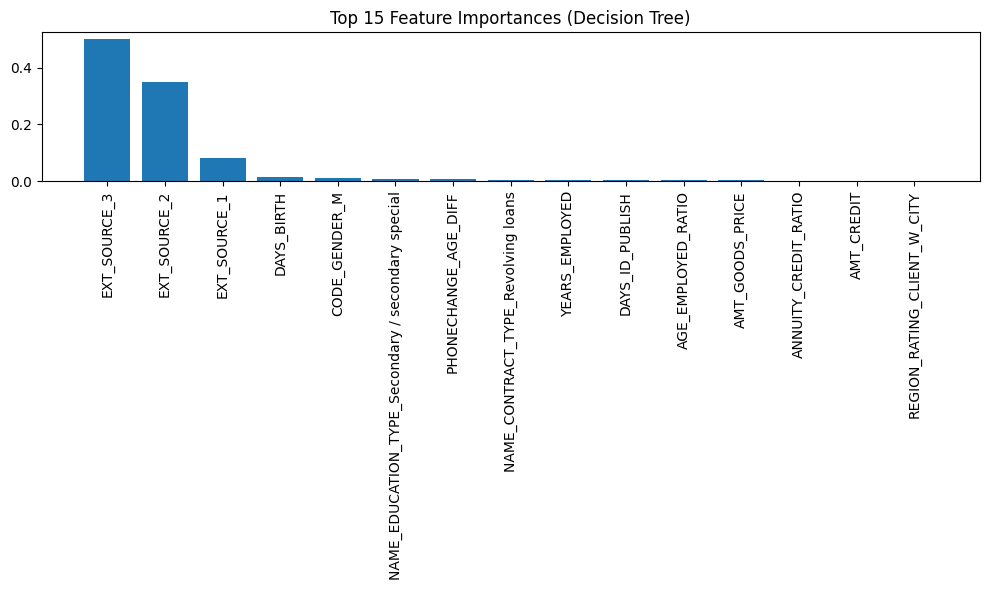

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Get feature importances
importances = dt_pruned.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances (Decision Tree)")
plt.bar(range(15), importances[indices[:15]], align="center")
plt.xticks(range(15), [feature_names[i] for i in indices[:15]], rotation=90)
plt.tight_layout()
plt.show()


**Compare with Random Forest**

In [19]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=8,             # Limit depth to avoid overfitting
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)

print("Validation Accuracy (Random Forest):", rf.score(X_val, y_val))
print("Test Accuracy (Random Forest):", rf.score(X_test, y_test))


Validation Accuracy (Random Forest): 0.7043673376475562
Test Accuracy (Random Forest): 0.7042745882314684


## <font face="Gramond" color="peachpuff"> Finalization </font>

In [20]:
import pickle

# Save the model to a file
with open('best_decision_tree_model.pkl', 'wb') as file:
    pickle.dump(best_dt, file)

print("✅ Model saved successfully as 'best_decision_tree_model.pkl'")


✅ Model saved successfully as 'best_decision_tree_model.pkl'


In [ ]:
# ✅ Save the final feature names to CSV
final_columns = X.columns.tolist()
import pandas as pd
pd.Series(final_columns).to_csv("final_feature_list.csv", index=False, header=False)

print(f"Number of features: {len(final_columns)}")
print(final_columns[:10]) 


Number of features: 243
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION']


In [ ]:
pip install streamlit